# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

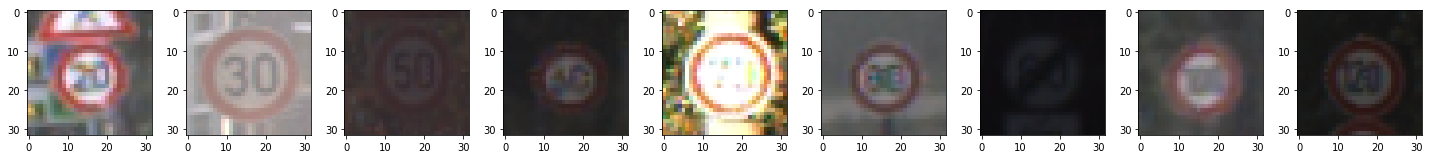

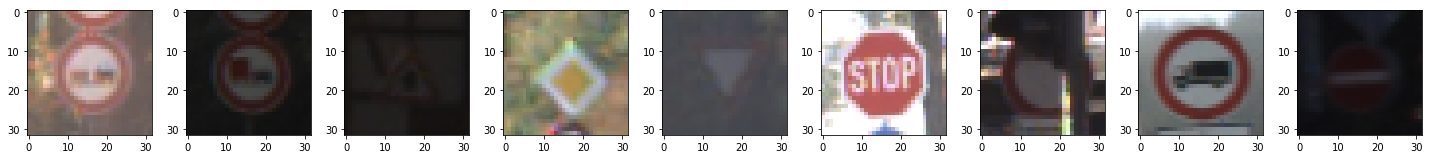

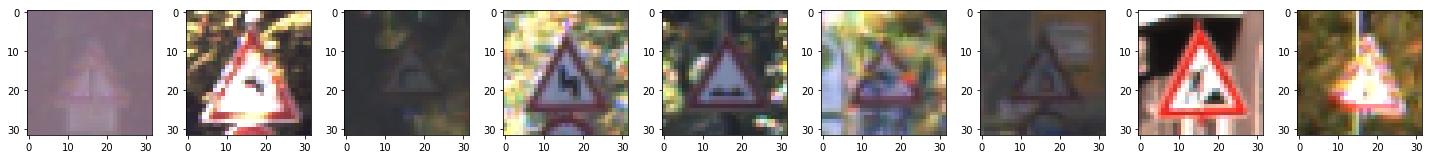

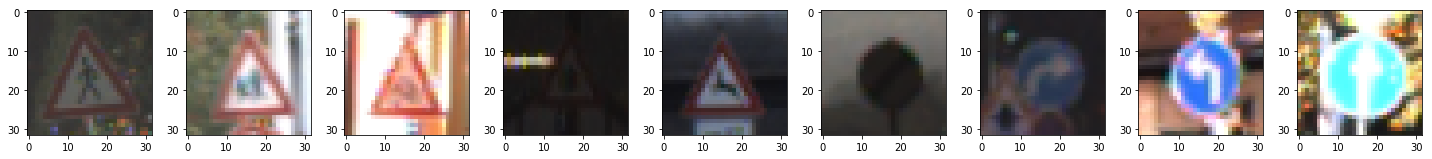

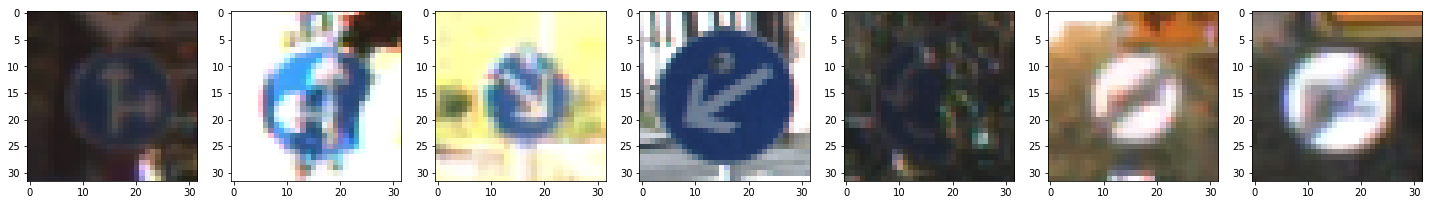

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as numpy

import cv2
import matplotlib
from sklearn.utils import shuffle

# Visualizations will be shown in the notebook.
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
possible_types=set(y_train)
possible_types_list = list(possible_types)
mini_batch_size = 9
for start in range(0, n_classes, mini_batch_size): 
    end = start+mini_batch_size
    if(end > n_classes):
        fig, axes = plt.subplots(1, mini_batch_size - (end - n_classes))
        end = n_classes
    else:
        fig, axes = plt.subplots(1,mini_batch_size)
    for i, (z, ax) in enumerate(zip(possible_types_list[start:end], axes)):
        index = numpy.where(y_train==z)[0][0]
        if(index >=0):
            ax.imshow(X_train[index].squeeze())

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
#for i in range(0, len(X_train)):
    #X_train[i] = cv2.cvtColor(X_train[i].squeeze(), cv2.COLOR_RGB2GRAY)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** Tried chaning the channel and normalize but getting errors so had to comment it.

In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
    
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** Loaded the training data from files provide and divided 20% as cross valication data and left rest 80% as training data. Test data was loaded from file provided.

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def arch(x) :
    mu = 0
    std = 0.1

    # conv 1
    w1 = tf.Variable(tf.truncated_normal((5, 5, 3, 6), mu, std ))
    b1 = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, w1, [1, 1, 1, 1], 'VALID') + b1
    # relu
    conv1 = tf.nn.relu(conv1)
    # pooling
    conv1 = tf.nn.max_pool(conv1, [1, 2, 2, 1], [1, 2, 2, 1],'VALID')
    
    # conv 2
    w2 = tf.Variable(tf.truncated_normal((5, 5, 6, 16), mu, std ))
    b2 = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, w2, [1, 1, 1, 1], 'VALID') + b2
    # relu
    conv2 = tf.nn.relu(conv2)
    # pooling
    conv2 = tf.nn.max_pool(conv2, [1, 2, 2, 1], [1, 2, 2, 1],'VALID')   
    
    f1 = flatten(conv2)
    
    w3 = tf.Variable(tf.truncated_normal((400, 120), mu, std ))
    b3 = tf.Variable(tf.zeros(120))
    f2 = tf.matmul(f1, w3) + b3
    
    w4 = tf.Variable(tf.truncated_normal((120, 84), mu, std ))
    b4 = tf.Variable(tf.zeros(84))
    f3 = tf.matmul(f2, w4) + b4
    
    w5 = tf.Variable(tf.truncated_normal((84, 43), mu, std ))
    b5 = tf.Variable(tf.zeros(43))
    f4 = tf.matmul(f3, w5) + b5
    
    return f4
    


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** Model uses 3 convulation layers and uses fully connected 
Input layer is of size 32x32x3
Layer 1 was convolutional that outputs shape as 28x28x6.
Relu activation was used as activation layer. 
Pooling step then convert the output shape to 14x14x6.
Layer 2 was convolutional that outputs shape as 10x10x16.
Relu activation was used as activation layer.
Pooling step then convert the output shape to 5x5x16.
Step to flatten the output shape of the final pooling layer such that it's 1D instead of 3D. 
Layer 3 was fully connected with an output of 120.
Relu activation was used as activation layer.
Layer 4 was fully connected with an output of 84.
Relu activation was used as activation layer.
Layer 5 was fully connected with an output of 10 loits.

In [7]:
### Train your model here.
### Feel free to use as many code cells as needed.
import os

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot = tf.one_hot(y, 43)

rate = 0.001

logits = arch(x)
cen = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot)
loss = tf.reduce_mean(cen)
optimizer = tf.train.AdamOptimizer(rate)
training_operation = optimizer.minimize(loss)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    session = tf.get_default_session()
    accuracy = session.run(accuracy_operation, feed_dict={x:X_data, y: y_data})
    return accuracy

def train(X_train, y_train, X_cv, y_cv):
    EPOCHS = 20
    BATCH_SIZE = 64

    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        num_examples = len(X_train)

        print("Start the training...")
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                session.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            validation_accuracy = evaluate(X_cv, y_cv)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()


        saver.save(session, os.getcwd() + os.sep + 'tafficsign')
        print("Model is saved to " + os.getcwd() + os.sep + 'tafficsign')

train(X_train, y_train, X_cv, y_cv)

Start the training...
EPOCH 1 ...
Validation Accuracy = 0.562

EPOCH 2 ...
Validation Accuracy = 0.801

EPOCH 3 ...
Validation Accuracy = 0.879

EPOCH 4 ...
Validation Accuracy = 0.853

EPOCH 5 ...
Validation Accuracy = 0.917

EPOCH 6 ...
Validation Accuracy = 0.923

EPOCH 7 ...
Validation Accuracy = 0.938

EPOCH 8 ...
Validation Accuracy = 0.920

EPOCH 9 ...
Validation Accuracy = 0.930

EPOCH 10 ...
Validation Accuracy = 0.947

EPOCH 11 ...
Validation Accuracy = 0.953

EPOCH 12 ...
Validation Accuracy = 0.949

EPOCH 13 ...
Validation Accuracy = 0.946

EPOCH 14 ...
Validation Accuracy = 0.956

EPOCH 15 ...
Validation Accuracy = 0.944

EPOCH 16 ...
Validation Accuracy = 0.943

EPOCH 17 ...
Validation Accuracy = 0.951

EPOCH 18 ...
Validation Accuracy = 0.962

EPOCH 19 ...
Validation Accuracy = 0.951

EPOCH 20 ...
Validation Accuracy = 0.936

Model is saved to C:\Users\Mahen\OneDrive\Documents\SelfDrivingCar\CarND-Traffic-Sign-Classifier-Project\tafficsign


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** Model was trained using 
AdamOptimizer (tried Gradient Descent optimizer but it had only 0.1% accuracy) with batch size of 64 and epochs of 20 and learning rate of 0.001

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** For the architecture I used AdamOptimizer because I noted it was easier and quicker for the model to coverge as compared to GradientDescent, while helped me avoid to increase the EPOC size. As I used CNN architecture for training the model as it is one of the best suited alogritham for images and makes the forward function efficient to implement by reducing the number of paraterms required to train the model.
For activation I used ReLU activation because of the efficieny in calculation as compared to some other like sigmoid. Also helps us in coverting the network int non liner model.
I played with different values for the hyper parameters like learning rate, I tried using rate of 0.01 and it need many EPOCs to train of was not converging. Learning rate of 0.001 was best compared to other values. Regarding EPOC, noticed less EPOC was resulting in lesser accuracy but higher EPOCs like 30 was not making a huge difference as compared to selected EPOC 20, so for efficieny selected 20. As far as batch size, tried higher batch size which slowed down the system because of memory requirement whereas decreasing it required more EPOCs to converge, and had the best accuracy with batch size of 64.

In [8]:
def test(X_test, y_test):
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        saver.restore(session, tf.train.latest_checkpoint('.'))

        test_accuracy = evaluate(X_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        
test(X_test, y_test)

Test Accuracy = 0.866


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

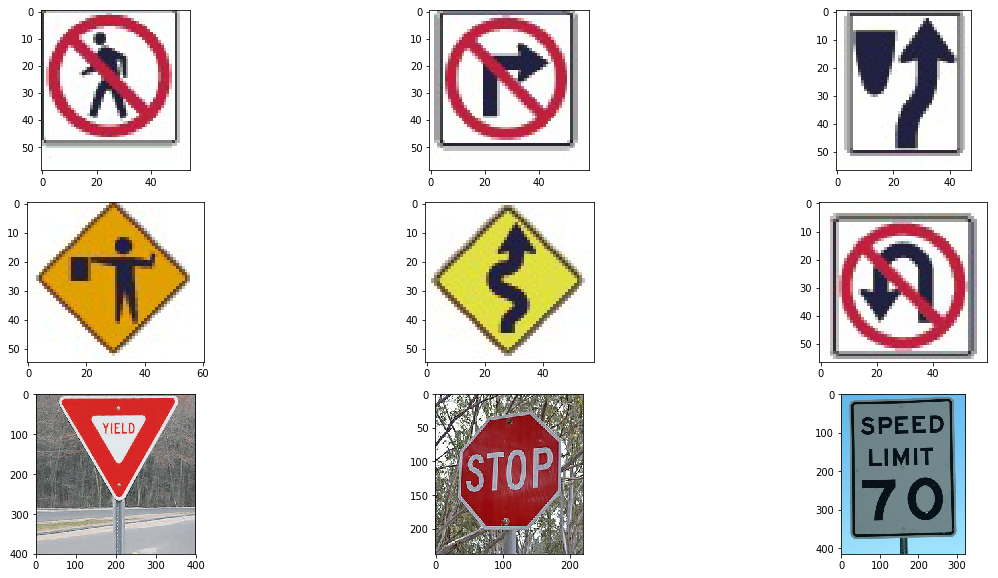

In [9]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

image1=mpimg.imread('1.jpg')
plt.subplot(3,3,1)
plt.imshow(image1)

image2=mpimg.imread('2.jpg')
plt.subplot(3,3,2)
plt.imshow(image2)

image3=mpimg.imread('3.jpg')
plt.subplot(3,3,3)
plt.imshow(image3)

image4=mpimg.imread('4.jpg')
plt.subplot(3,3,4)
plt.imshow(image4)

image5=mpimg.imread('5.jpg')
plt.subplot(3,3,5)
plt.imshow(image5)

image6=mpimg.imread('6.jpg')
plt.subplot(3,3,6)
plt.imshow(image6)

image7=mpimg.imread('7.jpg')
plt.subplot(3,3,7)
plt.imshow(image7)

image8=mpimg.imread('8.jpg')
plt.subplot(3,3,8)
plt.imshow(image8)

image9=mpimg.imread('9.jpg')
plt.subplot(3,3,9)
plt.imshow(image9)




### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** Local images are not predicated correctly except for Stop sign which is common between US in Germany.

In [10]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
appended_images=[]
appended_images.append(cv2.resize(image1, (32, 32))[:,:,0:3])
appended_images.append(cv2.resize(image2, (32, 32))[:,:,0:3]) 
appended_images.append(cv2.resize(image3, (32, 32))[:,:,0:3])
appended_images.append(cv2.resize(image4, (32, 32))[:,:,0:3]) 
appended_images.append(cv2.resize(image5, (32, 32))[:,:,0:3])
appended_images.append(cv2.resize(image6, (32, 32))[:,:,0:3])
appended_images.append(cv2.resize(image7, (32, 32))[:,:,0:3])
appended_images.append(cv2.resize(image8, (32, 32))[:,:,0:3])
appended_images.append(cv2.resize(image9, (32, 32))[:,:,0:3])
appended_images=np.array(appended_images)

predict=tf.argmax(logits,1)
import csv
reader = csv.reader(open('signnames.csv', 'r'))
dic = {}
for row in reader:
   k, v = row
   dic[k] = v

def personal_test(X_test):
    with tf.Session() as session:
        saver.restore(session, tf.train.latest_checkpoint('.'))
        prediction = session.run(predict, feed_dict={x:X_test})
        
        for i in range(9):
            print("Systems prediction for image {}  is {}".format(i+1, prediction[i]))
            print("Which as per dictionary is ",dic[str(prediction[i])])
        

personal_test(appended_images)



Systems prediction for image 1  is 18
Which as per dictionary is  General caution
Systems prediction for image 2  is 4
Which as per dictionary is  Speed limit (70km/h)
Systems prediction for image 3  is 41
Which as per dictionary is  End of no passing
Systems prediction for image 4  is 14
Which as per dictionary is  Stop
Systems prediction for image 5  is 1
Which as per dictionary is  Speed limit (30km/h)
Systems prediction for image 6  is 3
Which as per dictionary is  Speed limit (60km/h)
Systems prediction for image 7  is 20
Which as per dictionary is  Dangerous curve to the right
Systems prediction for image 8  is 14
Which as per dictionary is  Stop
Systems prediction for image 9  is 19
Which as per dictionary is  Dangerous curve to the left


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


Answer: The model only predicated 22.2% correctly on local image dataset comapared to the 90% accurracy on test data set. It is even worse compared to Cross Validation dataset which was 96.3%. I believe the model did not perform as per expectation as local signs are different then what the model was trained on which were German signs.

[18 10 33]
[ 4  1 15]
[41 12  9]
[14 12 18]
[ 1  2 37]
[ 3 34  1]
[20 17 41]
[14  4  9]
[19 34  9]


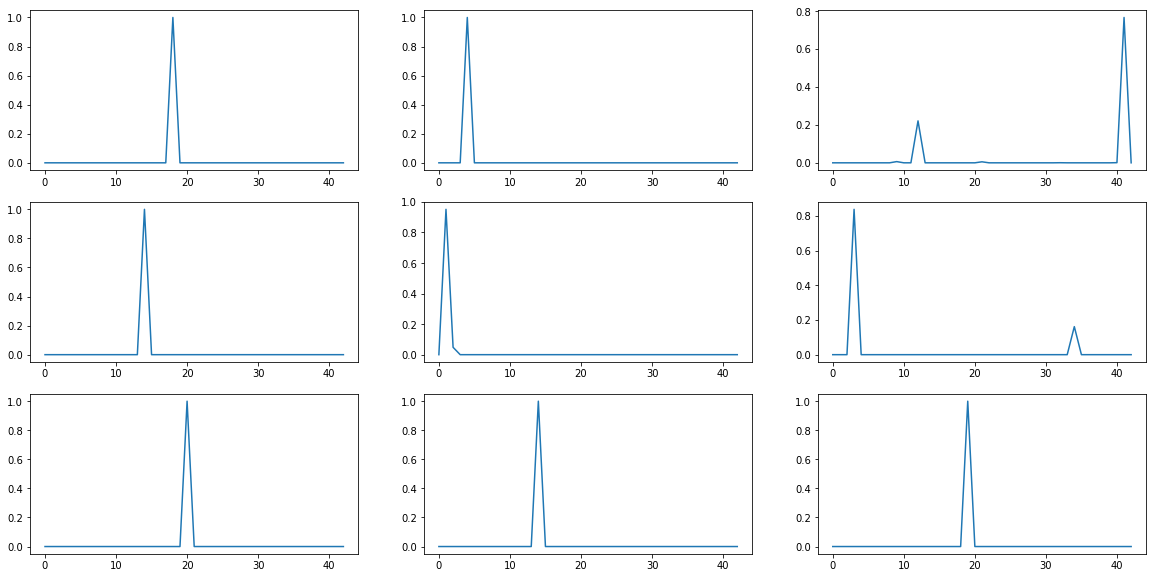

In [11]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
topK_define=tf.nn.top_k(tf.nn.softmax(logits), k=3)
softmax_define=tf.nn.softmax(logits)
with tf.Session() as session:
    saver.restore(session, tf.train.latest_checkpoint('.'))
    topK=session.run(topK_define,feed_dict={x:appended_images})
    softmax=session.run(softmax_define,feed_dict={x:appended_images})
    for i in range(len((topK[0:1][0]))):
        plt.subplot(3,3,i+1)
        plt.plot(softmax[i])
        print(topK[1:2][0][i])

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** As mentioned before the prediction of local images' accuarcy is pretty low and is because of the difference in the signs between Germany and North Carolina.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.